In [1]:
# Load the TensorBoard notebook extension.
#%load_ext tensorboard

# Setting --path_prefix /tensorboard is required
#%tensorboard --logdir <path-to-your-logs> --path_prefix /tensorboard

In [2]:
config_name = 'base_config_patches'
full_or_patch  = 'patch'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.insert(1, '/home/quahb/caipi_denoising/src')

from utils.data_io import load_dataset
from preparation.gen_data import get_test_data

dataset_folder = os.path.join('/home/quahb/caipi_denoising/data/results/', config_name)

In [4]:
X, y = load_dataset(dataset_folder)
X.shape, y.shape

    Loading slices...


((50, 384, 384, 1), (50, 384, 384))

In [5]:
def shuffle_data(X, y):
    order = np.random.permutation(len(X))
    return X[order], y[order]

In [6]:
X, y = shuffle_data(X, y)

In [7]:
def plot_results():
    init_slc = 45
    slcs_to_show = 5
    
    figure, axis = plt.subplots(slcs_to_show, 2, figsize=(27,60))
    for i in range(slcs_to_show):
        axis[i, 0].imshow(X[init_slc], cmap='gray')
        axis[i, 1].imshow(y[init_slc], cmap='gray')
        init_slc += 1
        
    plt.show()

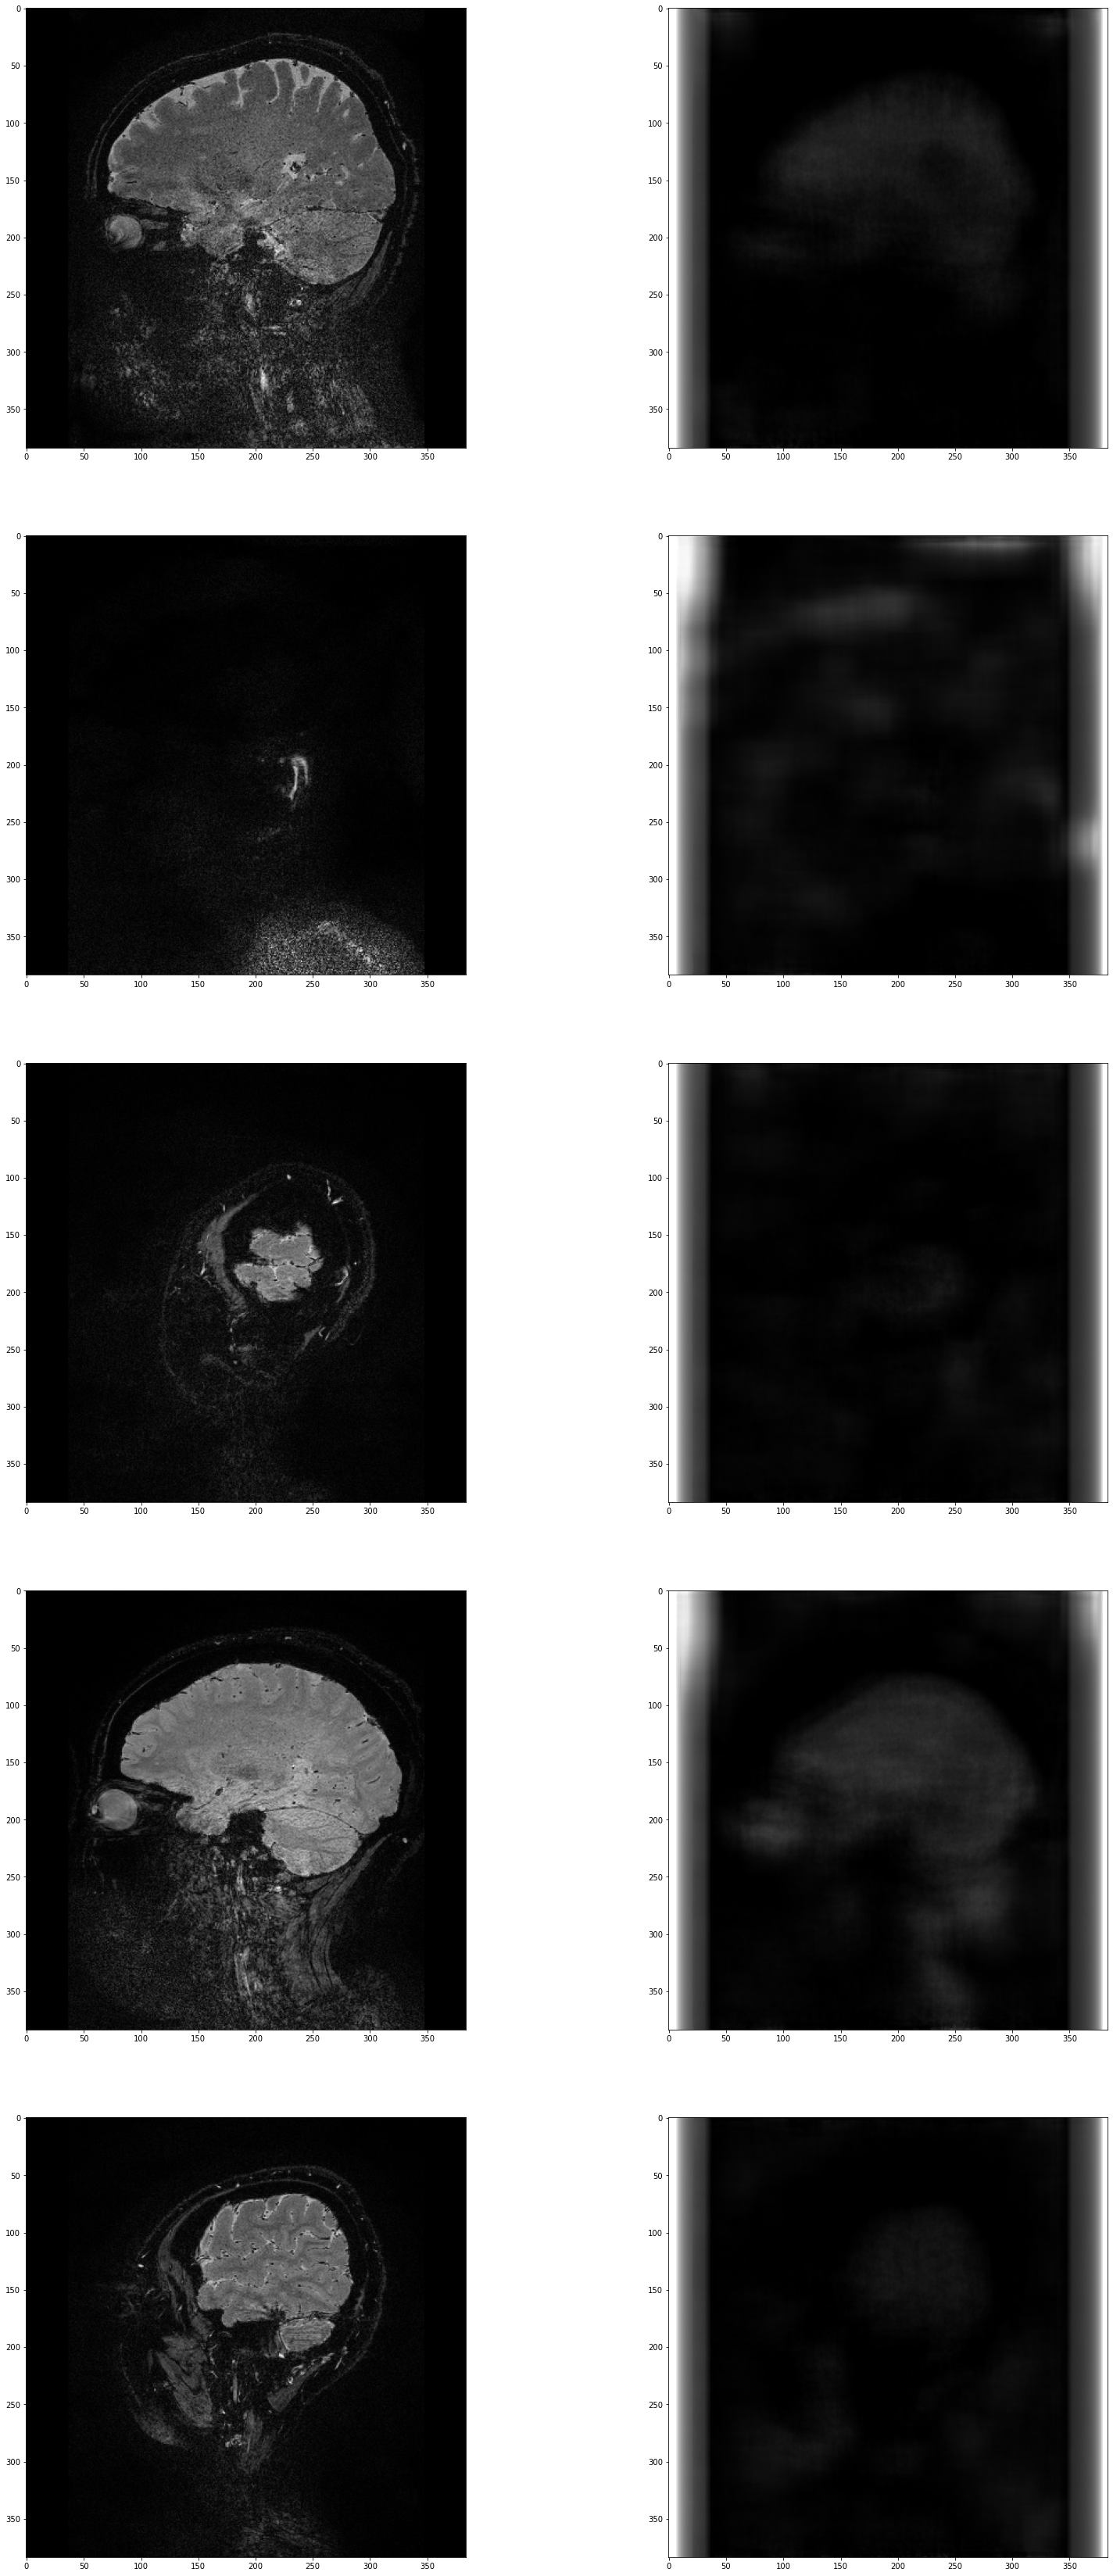

In [8]:
plot_results()